In [1]:
import os
import json

In [51]:
import json # 체크포인트를 로드하여 작업시 필요한 수치들 저장
path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/'
path_part = path + os.listdir(path)[0] + '/'
path_part_dt01 = path_part + os.listdir(path_part)[0] + '/'
os.listdir(path_part_dt01)

['KETI_MULTIMODAL_0000000012',
 'KETI_MULTIMODAL_0000000012_interpolation.json',
 'KETI_MULTIMODAL_0000000012_jiyu.json',
 'KETI_MULTIMODAL_0000000012_jiyu_interpolation.json',
 'KETI_MULTIMODAL_0000000012_roykim1234.json',
 'KETI_MULTIMODAL_0000000012_roykim1234_interpolation.json']

In [ ]:
with open(path_part_dt01 + os.listdir(path_part_dt01)[1], 'r', encoding = 'utf8') as f:
    json_data = json.load(f)
json_data['shot_infos'][0]

In [61]:
# 경로추출을 통한 영상 및 중복사진 제거
from tqdm.notebook import tqdm

video_list = []
photo_list = []
path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/'
for t in tqdm(range(len(os.listdir(path)))):
    path_part = path + os.listdir(path)[t] + '/'
    for i in range(len(os.listdir(path_part))):
        path_part_dt01 = path_part + os.listdir(path_part)[i] + '/'
        for k in range(len(os.listdir(path_part_dt01))): 
            if 'mp4' in os.listdir(path_part_dt01)[k]:
                video =  path_part_dt01 + os.listdir(path_part_dt01)[k]
                video_list.append(video)
        for folder_name in os.listdir(path_part_dt01):
            if '.' not in folder_name:
                path_part_dt02 = path_part_dt01 + folder_name + '/'
        for folder_name in os.listdir(path_part_dt02):
            if '.' not in folder_name:
                path_part_dt03 = path_part_dt02 + folder_name + '/'
                for photo in os.listdir(path_part_dt03)[1:]:
                    photo_name = path_part_dt03 + photo
                    photo_list.append(photo_name)   
                    
# 필요없는 영상 및 중복사진 삭제
for video in tqdm(video_list):
    os.remove(video)
for photo in tqdm(photo_list):
    os.remove(photo)

  0%|          | 0/11 [00:00<?, ?it/s]

In [77]:
# 이미지 경로 추출
from tqdm.notebook import tqdm
photo_list = []
photo_dir_list = []
photo_folderName_list = []
path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/'
for t in tqdm(range(len(os.listdir(path)))):
    path_part = path + os.listdir(path)[t] + '/'
    for i in range(len(os.listdir(path_part))):
        path_part_dt01 = path_part + os.listdir(path_part)[i] + '/'
        for folder_name in os.listdir(path_part_dt01):
            if '.' not in folder_name:
                path_part_dt02 = path_part_dt01 + folder_name + '/'
        for folder_name in os.listdir(path_part_dt02):
            if '.' not in folder_name:
                photo_folderName_list.append(folder_name)
                path_part_dt03 = path_part_dt02 + folder_name + '/'
                for photo in os.listdir(path_part_dt03):
                    photo_dir = path_part_dt03 + photo
                    photo_list.append(photo)
                    photo_dir_list.append(photo_dir)   

  0%|          | 0/11 [00:00<?, ?it/s]

In [102]:
import pandas as pd
df = pd.DataFrame({'사진경로(전체경로)' : photo_dir_list, '사진이름' : photo_list})
df['사진경로(이미지폴더)'] = [0 for _ in range(len(photo_dir_list))]

In [101]:
len(photo_dir_list), len(photo_list), len(photo_folderName_list)

(24191, 24191, 24198)

In [104]:
# for photo_folderName in tqdm(photo_folderName_list):
#     for i in range(len(photo_dir_list)):
#         if photo_folderName in df['사진경로(전체경로)'][i]:
#             df['사진경로(이미지폴더)'][i] = photo_folderName

  0%|          | 0/24198 [00:00<?, ?it/s]

In [118]:
n = 5500
df['사진경로(전체경로)'][n], df['사진경로(이미지폴더)'][n] 
df.to_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중1).csv', index = False)

In [119]:
df = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중1).csv')
df.head()

,사진경로(전체경로),사진이름,사진경로(이미지폴더)
0,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000009.jpg,KETI_SHOT_0000145747
1,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000041.jpg,KETI_SHOT_0000145748
2,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000092.jpg,KETI_SHOT_0000145749
3,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000172.jpg,KETI_SHOT_0000145750
4,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KM_0000000213.jpg,KETI_SHOT_0000145751


In [186]:
# 불필요 json파일 제거
from tqdm.notebook import tqdm

json_list = []
path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/'
for t in tqdm(range(len(os.listdir(path)))):
    path_part = path + os.listdir(path)[t] + '/'
    for i in range(len(os.listdir(path_part))):
        path_part_dt01 = path_part + os.listdir(path_part)[i] + '/'
        for json_file in os.listdir(path_part_dt01):
            if '.' not in json_file:
                json_file_N = json_file
        for json_file in os.listdir(path_part_dt01):
            if json_file != json_file_N and json_file != json_file_N + '_interpolation.json':
                json_list.append(path_part_dt01 + json_file)

  0%|          | 0/11 [00:00<?, ?it/s]

In [189]:
len(set(json_list)), len(json_list)

(7196, 7196)

In [179]:
path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/'
path_part = path + os.listdir(path)[0] + '/'
path_part_dt01 = path_part + os.listdir(path_part)[0] + '/'

with open(path_part_dt01 + os.listdir(path_part_dt01)[1], 'r', encoding = 'utf8') as f:
    json_data = json.load(f)
print(len(json_data['shot_infos'][0]))
print(json_data['shot_infos'][0]['image_folder']) # 이미지 사진이 저장된 폴더 이름
print(len(json_data['shot_infos'][0]['visual_infos'])) 
print(json_data['shot_infos'][0]['visual_infos'][0]['image_id']) # 이미지 파일이름
print(json_data['shot_infos'][0]['visual_infos'][0]['image_descs']) # 캡셔닝 데이터
json_data['shot_infos'][1]['image_folder']
os.listdir(path_part_dt01)

2
KETI_SHOT_0000145756
53
KM_0000000448.jpg
['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남자는 흰 셔츠를 입고있다', '남자는 옆을 보고있다']


['KETI_MULTIMODAL_0000000012',
 'KETI_MULTIMODAL_0000000012_interpolation.json',
 'KETI_MULTIMODAL_0000000012_jiyu.json',
 'KETI_MULTIMODAL_0000000012_jiyu_interpolation.json',
 'KETI_MULTIMODAL_0000000012_roykim1234.json',
 'KETI_MULTIMODAL_0000000012_roykim1234_interpolation.json']

In [161]:
df = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중1).csv')
df['캡셔닝_데이터'] = [0 for _ in range(len(df['사진이름']))]
df['사진경로(전체경로)'][0]

'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/멀티모달_Part_01/KETI_MULTIMODAL_0000000012/KETI_MULTIMODAL_0000000012/KETI_SHOT_0000145747/KM_0000000009.jpg'

In [473]:
# 사진별 캡셔닝 데이터 추출 및 데이터 프레임에 저장
from tqdm.notebook import tqdm

caption_list = []
image_name_list = []
path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/'
for t in tqdm(range(len(os.listdir(path)))):
    path_part = path + os.listdir(path)[t] + '/'
    for i in range(len(os.listdir(path_part))):
        path_part_dt01 = path_part + os.listdir(path_part)[i] + '/'
        for json_file in os.listdir(path_part_dt01):
            if '.' not in json_file:
                json_file_N = json_file
        json_file = path_part_dt01 + json_file_N + '_interpolation.json'
        try:
            with open(json_file, 'r', encoding = 'utf8') as f: 
                json_data = json.load(f)
            for num1 in range(len(json_data['shot_infos'])):
                for num2 in range(len(df['사진경로(전체경로)'])):
                    if json_data['shot_infos'][num1]['image_folder'] == df['사진경로(이미지폴더)'][num2]:
                        for num3 in range(len(json_data['shot_infos'][num1]['visual_infos'])):
                            if json_data['shot_infos'][num1]['visual_infos'][num3]['image_id'] == df['사진이름'][num2]:
                                df['캡셔닝_데이터'][num2] = json_data['shot_infos'][num1]['visual_infos'][num3]['image_descs']
                                caption_list.append(json_data['shot_infos'][num1]['visual_infos'][num3]['image_descs'])
                                image_name_list.append(df['사진경로(전체경로)'][num2])
        except:
            print(json_file)
# 프린트 되는 json파일은 오류가 뜬것입니다.....

  0%|          | 0/11 [00:00<?, ?it/s]

In [252]:
# 방법1 : json에서 추출실패한 181개 값 삭제처리
list1 = [] 
for i in range(len(df[df['캡셔닝_데이터'] == 0]['사진경로(전체경로)'])):
    list1.append(list(df[df['캡셔닝_데이터'] == 0]['사진경로(전체경로)'])[i][90:129])
len(list1), len(list1)

(181, 181)

In [493]:
df_ch = df[df['캡셔닝_데이터'] != 0].copy()
df_ch.reset_index(drop = True, inplace = True)
df_ch.columns = ['사진경로', '사진이름', '사진폴더이름', '캡셔닝_데이터(종합)']

In [264]:
len(df), len(df_ch), (len(df) - len(df_ch))

(24191, 24010, 181)

In [503]:
# 방법2 : 추출할때 해당하는 이미지만 따로 추출하여 리스트로 변환후 df통합
print(len(caption_list), len(image_name_list))
n = 0
for i in range(len(caption_list)):
    for k in range(len(caption_list[i])):
        n += 1

df_ch_an = pd.DataFrame({'사진경로' : [0 for _ in range(n)], '캡셔닝_데이터' : [0 for _ in range(n)]})

n = 0
for i in range(len(image_name_list)):
    for k in range(len(caption_list[i])):
        df_ch_an['사진경로'][n] = image_name_list[i]
        df_ch_an['캡셔닝_데이터'][n] = caption_list[i][k]
        n += 1
df_ch_an

24010 24010


<ipython-input-503-e2f0068b399d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ch_an['캡셔닝_데이터'][n] = caption_list[i][k]
C:\Users\Bestc\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,사진경로,캡셔닝_데이터
0,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자들이 있다
1,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자들은 서로 쳐다보고있다
2,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자는 검정머리이다
3,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자는 흰 셔츠를 입고있다
4,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자는 옆을 보고있다
...,...,...
120040,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,여자가 앞쪽을 보고 있다
120041,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,여자는 입을 다물고 있다
120042,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,여자는 외투를 입었다
120043,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,여자의 외투에는 털이 달려있다


In [504]:
df_ch_an = pd.merge(df_ch_an, df_ch, left_on='사진경로', right_on='사진경로', how='left')
df_ch_an.head()

,사진경로,캡셔닝_데이터,사진이름,사진폴더이름,캡셔닝_데이터(종합)
0,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자들이 있다,KM_0000000448.jpg,KETI_SHOT_0000145756,"[남자들이 있다, 남자들은 서로 쳐다보고있다, 남자는 검정머리이다, 남자는 흰 셔츠..."
1,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자들은 서로 쳐다보고있다,KM_0000000448.jpg,KETI_SHOT_0000145756,"[남자들이 있다, 남자들은 서로 쳐다보고있다, 남자는 검정머리이다, 남자는 흰 셔츠..."
2,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자는 검정머리이다,KM_0000000448.jpg,KETI_SHOT_0000145756,"[남자들이 있다, 남자들은 서로 쳐다보고있다, 남자는 검정머리이다, 남자는 흰 셔츠..."
3,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자는 흰 셔츠를 입고있다,KM_0000000448.jpg,KETI_SHOT_0000145756,"[남자들이 있다, 남자들은 서로 쳐다보고있다, 남자는 검정머리이다, 남자는 흰 셔츠..."
4,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자는 옆을 보고있다,KM_0000000448.jpg,KETI_SHOT_0000145756,"[남자들이 있다, 남자들은 서로 쳐다보고있다, 남자는 검정머리이다, 남자는 흰 셔츠..."


남자1이 웃고 있다.


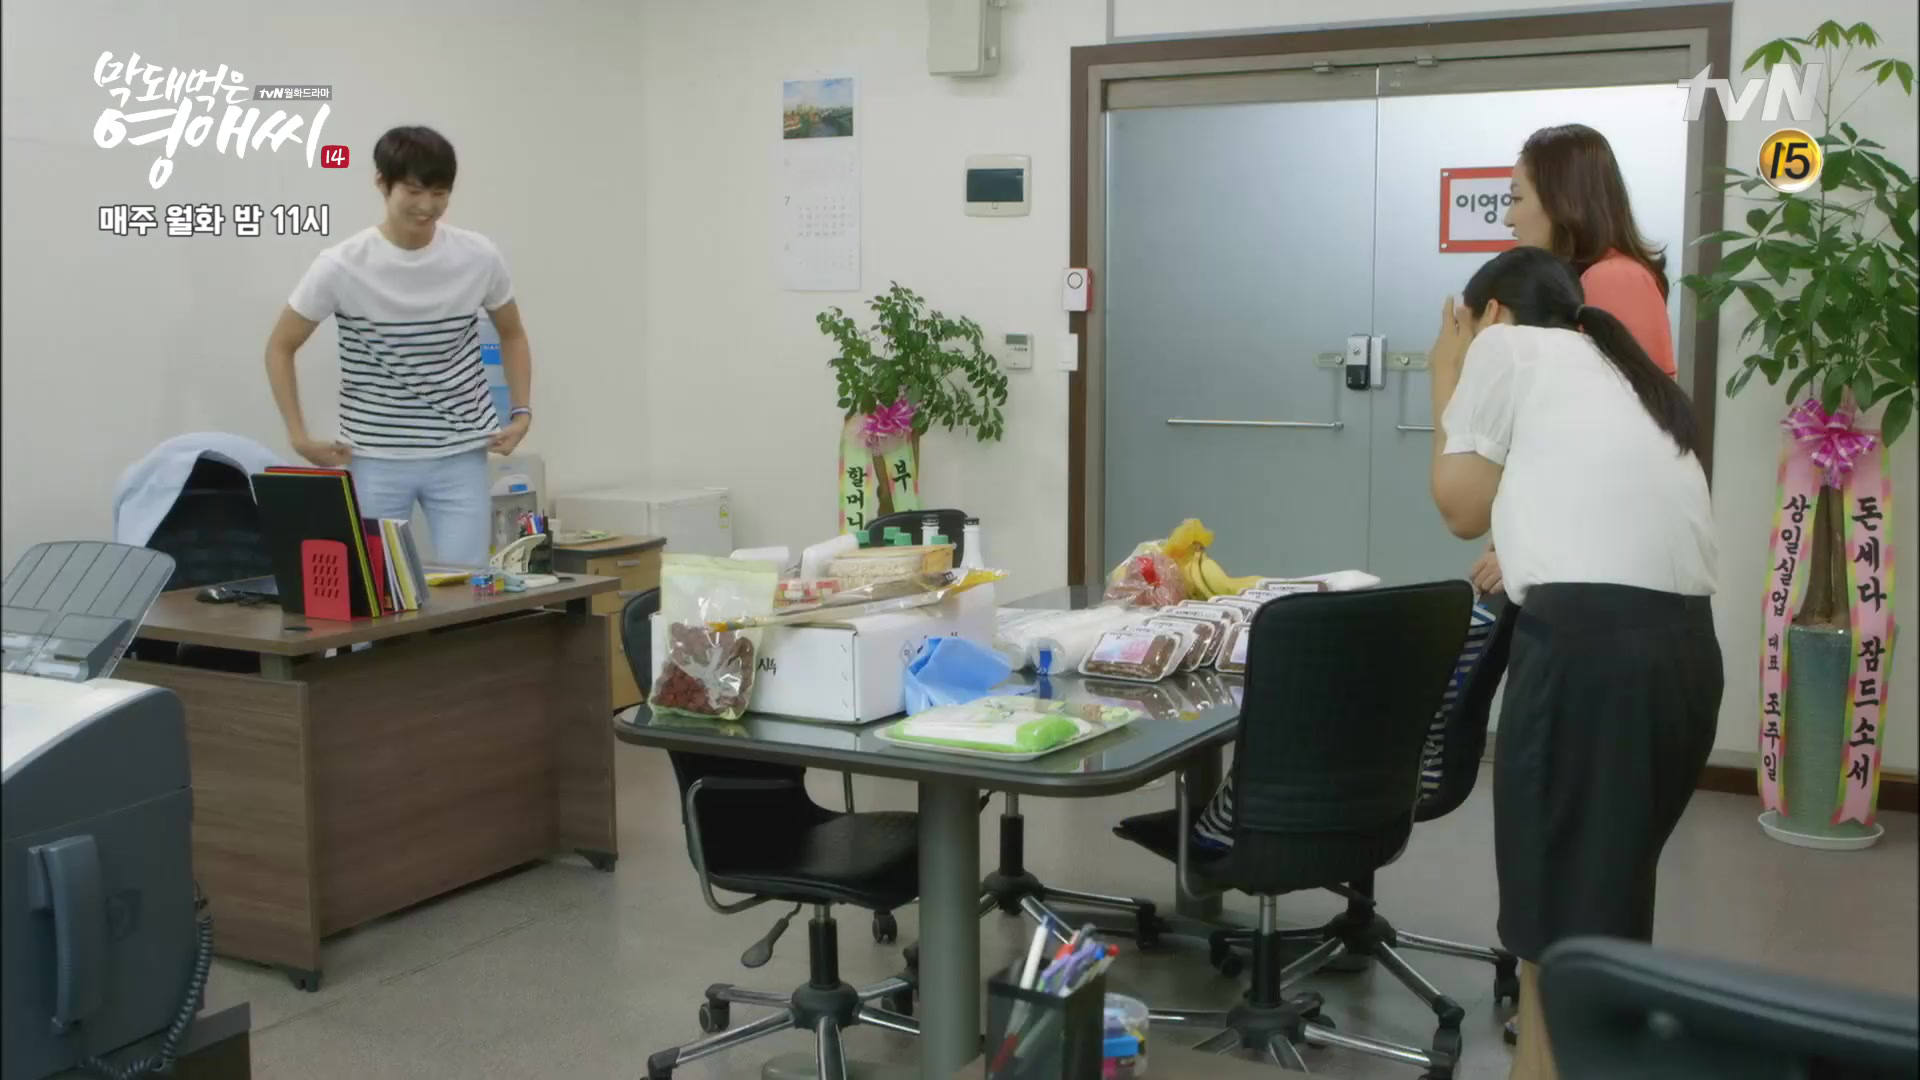

In [505]:
from PIL import Image
n = 5500
print(df_ch_an['캡셔닝_데이터'][n])
Image.open(df_ch_an['사진경로'][n])

In [511]:
# 캡셔닝 데이터가 없는 데이터 추가제거 - 146개
df_ch_an1 = df_ch_an[df_ch_an['캡셔닝_데이터'] != ''].copy()
df_ch_an1.reset_index(drop = True, inplace = True)
df_ch_an1

,사진경로,캡셔닝_데이터,사진이름,사진폴더이름,캡셔닝_데이터(종합)
0,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자들이 있다,KM_0000000448.jpg,KETI_SHOT_0000145756,"[남자들이 있다, 남자들은 서로 쳐다보고있다, 남자는 검정머리이다, 남자는 흰 셔츠..."
1,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자들은 서로 쳐다보고있다,KM_0000000448.jpg,KETI_SHOT_0000145756,"[남자들이 있다, 남자들은 서로 쳐다보고있다, 남자는 검정머리이다, 남자는 흰 셔츠..."
2,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자는 검정머리이다,KM_0000000448.jpg,KETI_SHOT_0000145756,"[남자들이 있다, 남자들은 서로 쳐다보고있다, 남자는 검정머리이다, 남자는 흰 셔츠..."
3,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자는 흰 셔츠를 입고있다,KM_0000000448.jpg,KETI_SHOT_0000145756,"[남자들이 있다, 남자들은 서로 쳐다보고있다, 남자는 검정머리이다, 남자는 흰 셔츠..."
4,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자는 옆을 보고있다,KM_0000000448.jpg,KETI_SHOT_0000145756,"[남자들이 있다, 남자들은 서로 쳐다보고있다, 남자는 검정머리이다, 남자는 흰 셔츠..."
...,...,...,...,...,...
119894,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,여자가 앞쪽을 보고 있다,KM_0000004318.jpg,KETI_SHOT_0000148199,"[여자가 앞쪽을 보고 있다, 여자는 입을 다물고 있다, 여자는 외투를 입었다, 여자..."
119895,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,여자는 입을 다물고 있다,KM_0000004318.jpg,KETI_SHOT_0000148199,"[여자가 앞쪽을 보고 있다, 여자는 입을 다물고 있다, 여자는 외투를 입었다, 여자..."
119896,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,여자는 외투를 입었다,KM_0000004318.jpg,KETI_SHOT_0000148199,"[여자가 앞쪽을 보고 있다, 여자는 입을 다물고 있다, 여자는 외투를 입었다, 여자..."
119897,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,여자의 외투에는 털이 달려있다,KM_0000004318.jpg,KETI_SHOT_0000148199,"[여자가 앞쪽을 보고 있다, 여자는 입을 다물고 있다, 여자는 외투를 입었다, 여자..."


In [512]:
df_ch_an1.to_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중2).csv', index = False)
df_ch_an1 = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(작성중2).csv')
df_ch_an1.head()

,사진경로,캡셔닝_데이터,사진이름,사진폴더이름,캡셔닝_데이터(종합)
0,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자들이 있다,KM_0000000448.jpg,KETI_SHOT_0000145756,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남..."
1,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자들은 서로 쳐다보고있다,KM_0000000448.jpg,KETI_SHOT_0000145756,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남..."
2,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자는 검정머리이다,KM_0000000448.jpg,KETI_SHOT_0000145756,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남..."
3,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자는 흰 셔츠를 입고있다,KM_0000000448.jpg,KETI_SHOT_0000145756,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남..."
4,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,남자는 옆을 보고있다,KM_0000000448.jpg,KETI_SHOT_0000145756,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남..."


In [514]:
check_point = 'Part_01' # Part_01 ~ 11까지 구분(기존 파일 폴더명)
df_ch['사진경로'][0]

'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달/멀티모달_분야/멀티모달_Part_01/KETI_MULTIMODAL_0000000012/KETI_MULTIMODAL_0000000012/KETI_SHOT_0000145747/KM_0000000009.jpg'

In [282]:
import shutil
image_path_bf = df_ch['사진경로'][0]
image_path_af = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달(자료통합)'
shutil.copy2(image_path_bf,image_path_af)

'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달(자료통합)\\KM_0000000009.jpg'

In [287]:
os.rename(image_path_af + '/' + df_ch['사진이름'][0], image_path_af + '/' + df_ch['사진폴더이름'][0] + '_' + df_ch['사진이름'][0])

In [291]:
import shutil
image_path_af = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달 데이터/멀티모달(자료통합)'
for i in tqdm(range(len(df_ch['사진경로']))):
    image_path_bf = df_ch['사진경로'][i]
    shutil.copy2(image_path_bf, image_path_af)
    os.rename(image_path_af + '/' + df_ch['사진이름'][i], image_path_af + '/' + df_ch['사진폴더이름'][i] + '_' + df_ch['사진이름'][i])

  0%|          | 0/24010 [00:00<?, ?it/s]

In [519]:
df_ch_an2 = df_ch_an1[['사진경로', '사진이름' ,'캡셔닝_데이터(종합)', '캡셔닝_데이터']].copy() 
df_ch_an2['사진이름'] = df_ch_an1['사진폴더이름'] + '_' + df_ch_an1['사진이름']
df_ch_an2['사진경로'] = image_path_af + '/' + df_ch_an2['사진이름']
df_ch_an2.head()

,사진경로,사진이름,캡셔닝_데이터(종합),캡셔닝_데이터
0,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자들이 있다
1,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자들은 서로 쳐다보고있다
2,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 검정머리이다
3,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 흰 셔츠를 입고있다
4,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 옆을 보고있다


In [523]:
for index, caption in enumerate(df_ch_an2['캡셔닝_데이터']):
    if '다' not in caption:
        print(caption, index) 

여자가 보라색 옷을 입고있따 563
여자가 보라색 셔츠를 입고있따 642
남자와 여자는 핑크색 옷을 입었 740
여자가 깃이 넓은 셔츠를 입고 있따 3679
여자가 깃이 넓은 셔츠를 입고 있따 3704
여자가 깃이 넓은 셔츠를 입고 있따 3714
여자가 깃이 넓은 셔츠를 입고 있따 3724
여자가 깃이 넓은 셔츠를 입고 있따 3734
여자가 머리를 4041
여자2가 웃고 있따 4208
여자가 무언가를 말하는 것 같가 7844
남자 한 명이 넥타이를 메고 있따 8408
남자 머리는 노란색이 섞여있따 9343
남자 한 명이 넥타이를 하고 있따 10601
여자가 레이스 원피스를 입고 있디. 10761
사람들이 길 위에 있따 11240
남자는 눈을 아래로 깔고 있ㄷ 13603
여자 앞쪽에 촛불이 있따 13795
사람이 휴대전화를 들고 있따 14984
머리를  16012
남자는 안대를 쓰고 있따 16465
두 명의 여자가 가게에 있따 17671
여자가 어쩔줄 몰라하고 있따. 19416
남자가 바닥을 바라보고 이싿. 19438
남자가 고개를 돌렸따 19454
남자가 빨간옷을 입고있따 20090
사람이 갈색 단화를 신고있따 20329
여자가 눈을 뜨고 있따  23910
입을 벌린 남성  24139
표정이 어두운 남성 24140
검은 상의를 입은 남성  24141
머리를 띄어 올린 남성  24142
눈매가 매서운 남성  24143
쇼파에 앉아있는 남성   24144
책들이 널부러져 있음 24145
집에서 앉아있는 남성  24146
스웨터를 입고있는 남성  24147
머리를 올린 남성  24148
여자가 고개를 돌려 남자를 바라보낟. 25288
남자가 바가지머리를 하고 있따 26086
남자는 턱에 반창고를 붙였따 26351
남자1의 턱에 무언가 붙어있따 26548
남자의 눈동자가 위로가있따 26567
남자가 회색 옷을 입고 있따 26936
여자가 붉은색 겉옷을 입고있따 27547
여자가 체크무늬 옷을 입고있따 28188
남자가 카키색 옷을 입고있디 28227
여자가 체크무늬 

In [541]:
# 맞춤법 틀린 캡셔닝 수정
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('. ', '.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('있따', '있다'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('입었따', '입었다'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('있디', '있다'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('입었', '입었다'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('같가', '같다'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('있ㄷ', '있다'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('이싿', '있다'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('입고있', '입고있다'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('돌렸따', '돌렸다'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('바라보낟.', '바라본다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('붙였따.', '붙였다'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('보인자.', '보인다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('보인자.', '보인다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('맸따', '맸다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('썼따', '썼다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('발랐따', '발랐다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('묶었따', '묶었다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('없ㄷ', '없다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('올라갔따', '올라갔다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('종이가 붙어', '종이가 붙어있다'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('손을대고있', '손을 대고있다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('올라갔따', '올라갔다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('야경이보이나', '야경이보인다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('잡았따.', '잡았다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('있자', '있다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('했따', '했다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('두남성', '두 남성'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('사람에게 말하', '사람에게 말하고 있다.'))
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: x.replace('썼어', '썼다.'))

# 잘못작성된 캡셔닝 삭제
df_ch_an2.drop([4041, 16012, 42924, 42925, 42926, 42926, 42927, 42928, 45772, 52809, 84563, 90020, 99708, 107738, 107748, 78550, \
                78551, 78552, 78553, 78554, 55884], inplace = True)
df_ch_an2.reset_index(drop = True, inplace = True)
df_ch_an2

import re
df_ch_an2['캡셔닝_데이터'] = df_ch_an2['캡셔닝_데이터'].apply(lambda x: re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9, ]', '', x))

In [542]:
for index, caption in enumerate(df_ch_an2['캡셔닝_데이터']):
    if '다' not in caption:
        print(caption, index) 

입을 벌린 남성  24133
표정이 어두운 남성 24134
검은 상의를 입은 남성  24135
머리를 띄어 올린 남성  24136
눈매가 매서운 남성  24137
쇼파에 앉아있는 남성   24138
책들이 널부러져 있음 24139
집에서 앉아있는 남성  24140
머리를 올린 남성  24142
남자는 턱에 반창고를 붙였따 26345
안타까워하는 남성 32424
슬퍼보이는 남성 32425
셔츠를 풀어헤친 남성 32426
입을 모은 남성 32427
넋이 나간듯한 남성 32428
스웨터를 입은 남성 32429
입을 벌린 남성 32430
머리가 헝클어진 남성 32431
허공을 응시하는 남성 32432
안타까워하는 표정의 남성1 32434
머리가 단정한 남성1 32435
가르마를 탄 남성1 32436
미간의 주름이 잡힌 남성1  32437
스웨터를 입은 남성  32438
자리를 박차고 나가는 남성 32439
머리가 헝클어진 남성 32440
급하게 나가려는 남성 32441
일어서는 남성 32442
얼굴을 찡그린 남성 32444
슬퍼보이는 남성1 32445
셔츠를 풀어헤친 남성1 32446
남성2를 붙잡는 남성1 32447
셔츠를 입은 남성1 32448
급히 일어나는 남성2 32449
우울해 보이는 남성1 32450
침대를 박차고 일어나려는 남성2 32451
머리가 헝클어진 남성2 32452
스웨터를 입은 남성  32453
우울한듯한 표정의 남성 32454
머리가 헝클어진 남성 32455
슬픈표정의 남성 32456
허공을 응시하는 남성 32457
베이지색 자켓을 입은 남성 34038
머리가 단정한 남성 34039
무언가를 보는 남성 34040
가르마를 탄 남성  34041
감정이 북받친듯한 남성 34042
베이지색 자켓을 입은 남성 34043
머리가 단정한 남성  34044
무언가를 보는 남성  34045
가르마를 탄 남성  34046
감동받은 남성 34047
베이지색 자켓을 입은 남성 34048
머리가 단정한 남성  34049
무언가를 보는 남성  34050
가르마를 탄

In [543]:
df_ch_an2

,사진경로,사진이름,캡셔닝_데이터(종합),캡셔닝_데이터
0,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자들이 있다
1,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자들은 서로 쳐다보고있다
2,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 검정머리이다
3,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 흰 셔츠를 입고있다다다다다다다
4,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 옆을 보고있다
...,...,...,...,...
119840,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000148199_KM_0000004318.jpg,"['여자가 앞쪽을 보고 있다', '여자는 입을 다물고 있다', '여자는 외투를 입었...",여자가 앞쪽을 보고 있다
119841,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000148199_KM_0000004318.jpg,"['여자가 앞쪽을 보고 있다', '여자는 입을 다물고 있다', '여자는 외투를 입었...",여자는 입을 다물고 있다
119842,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000148199_KM_0000004318.jpg,"['여자가 앞쪽을 보고 있다', '여자는 입을 다물고 있다', '여자는 외투를 입었...",여자는 외투를 입었다다다다다다다다
119843,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000148199_KM_0000004318.jpg,"['여자가 앞쪽을 보고 있다', '여자는 입을 다물고 있다', '여자는 외투를 입었...",여자의 외투에는 털이 달려있다


In [547]:
df_ch_an2.to_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(완료).csv', index = False)
df_ch_an2 = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final Project/Data/IC_Data/멀티모달_데이터정리(완료).csv')
df_ch_an2

,사진경로,사진이름,캡셔닝_데이터(종합),캡셔닝_데이터
0,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자들이 있다
1,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자들은 서로 쳐다보고있다
2,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 검정머리이다
3,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 흰 셔츠를 입고있다다다다다다다
4,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 옆을 보고있다
...,...,...,...,...
119840,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000148199_KM_0000004318.jpg,"['여자가 앞쪽을 보고 있다', '여자는 입을 다물고 있다', '여자는 외투를 입었...",여자가 앞쪽을 보고 있다
119841,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000148199_KM_0000004318.jpg,"['여자가 앞쪽을 보고 있다', '여자는 입을 다물고 있다', '여자는 외투를 입었...",여자는 입을 다물고 있다
119842,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000148199_KM_0000004318.jpg,"['여자가 앞쪽을 보고 있다', '여자는 입을 다물고 있다', '여자는 외투를 입었...",여자는 외투를 입었다다다다다다다다
119843,C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/Final...,KETI_SHOT_0000148199_KM_0000004318.jpg,"['여자가 앞쪽을 보고 있다', '여자는 입을 다물고 있다', '여자는 외투를 입었...",여자의 외투에는 털이 달려있다


['양복을 입은 두남성 ', '익어가는 감자탕이 남성들 사이에 있음 ', '먹을 준비를 하는 두남성 ', '음식이 식탁에 올려져 있음', '서로를 마주보는 두남성 ']
먹을 준비를 하는 두 남성 


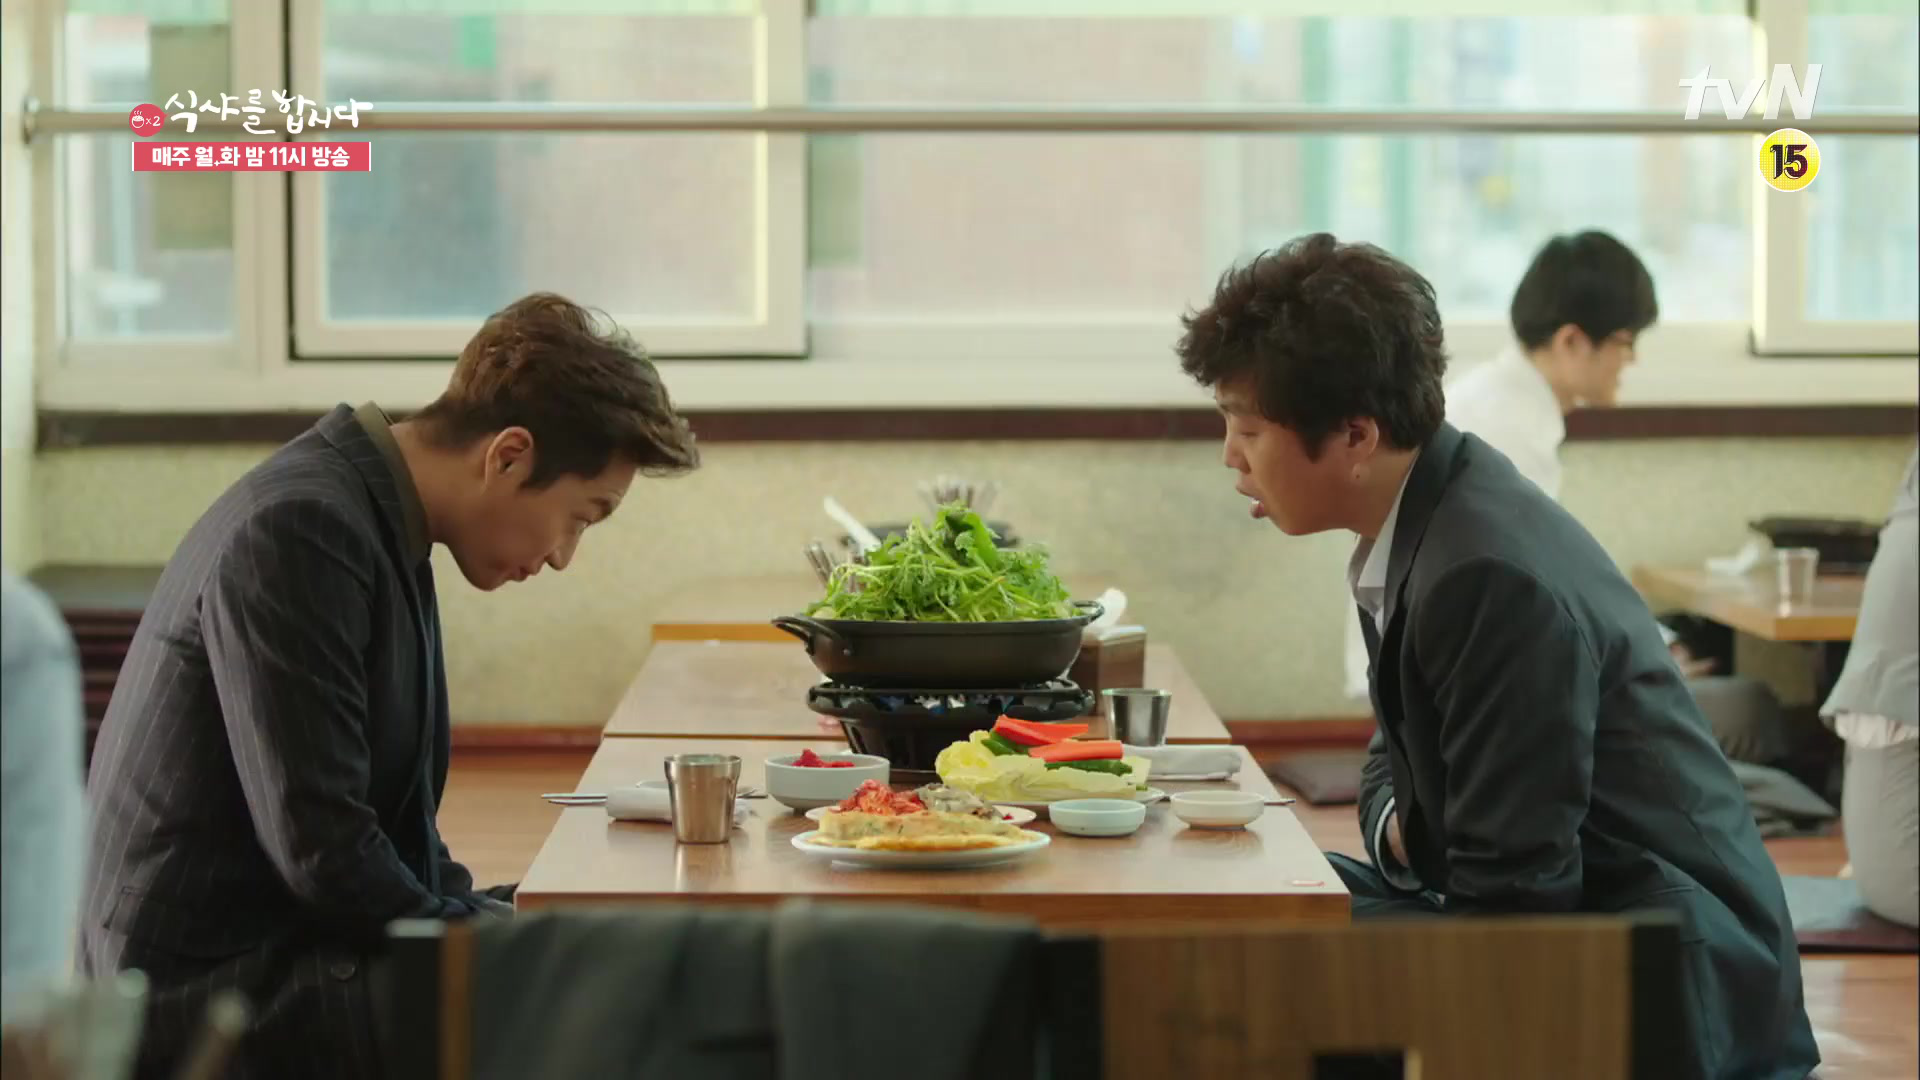

In [548]:
from PIL import Image
n = 107747
print(df_ch_an2['캡셔닝_데이터(종합)'][n])
print(df_ch_an2['캡셔닝_데이터'][n])
Image.open(df_ch_an2['사진경로'][n])